In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import approx_fprime

In [2]:
def gradient_descent(f, x0, alpha, max_iter=100, tol=1e-6, eps=1e-5):
    """Gradient descent implementation using numerical approximation of the gradient.

    Parameters:
        f: Objective function to minimize
        x0: Initial guess (as a NumPy array)
        alpha: Learning rate
        max_iter: Maximum number of iterations
        tol: Tolerance for the stopping criterion
        eps: Step size for finite differences in gradient approximation

    Returns:
        x: The estimated minimizer (NumPy array).
        x_history: List of iterates (history of x values).
    """
    x = x0
    x_history = [x]
    
    for t in range(max_iter):
        grad = approx_fprime(x, f, eps)       
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        x_history.append(x)
        
    return x, x_history

In [3]:
def f(point):
   x, y = point
   return (x - 2)**2 + 2 * (y - 5)**2

p0 = [0, 0]  # Initial guess
alpha = 0.1  # Learning rate

minimum, x_history = gradient_descent(f, p0, alpha)
print('Minimum:', minimum)
print('Number of iterations:', len(x_history))

Minimum: [1.99999021 4.999995  ]
Number of iterations: 59


Plot the learning curve

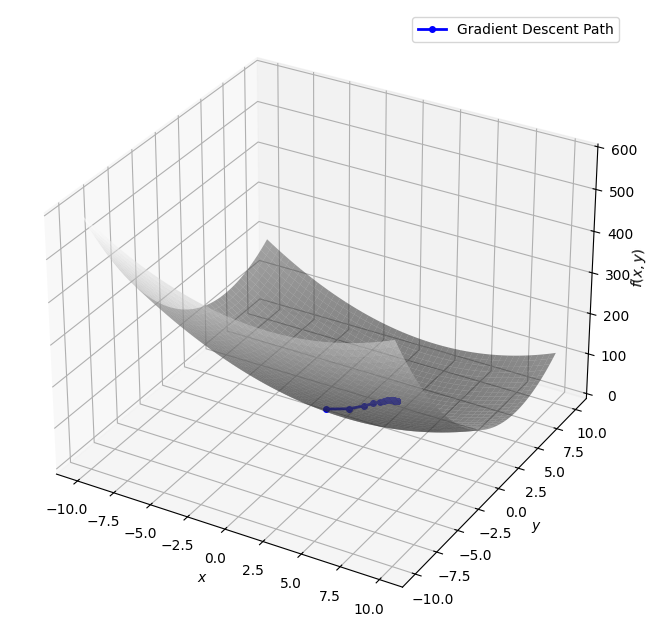

In [4]:
# Create a meshgrid for x and y values
x_values = np.linspace(-10, 10, 500)
y_values = np.linspace(-10, 10, 500)
x_mesh, y_mesh = np.meshgrid(x_values, y_values)

# Evaluate f over the meshgrid using broadcasting
z_mesh = f([x_mesh, y_mesh])

# Extract the path taken by gradient descent
x_path, y_path = np.array(x_history).T
z_path = f([x_path, y_path])

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='gray', alpha=0.5)

# Overlay the gradient descent path
ax.plot(x_path, y_path, z_path, color='b', marker='o', markersize=4, 
        linestyle='-', linewidth=2, label='Gradient Descent Path')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$', labelpad=-0.3)
ax.legend()

plt.savefig('figures/gradient_descent_path.pdf', bbox_inches='tight')

Scaling Issues

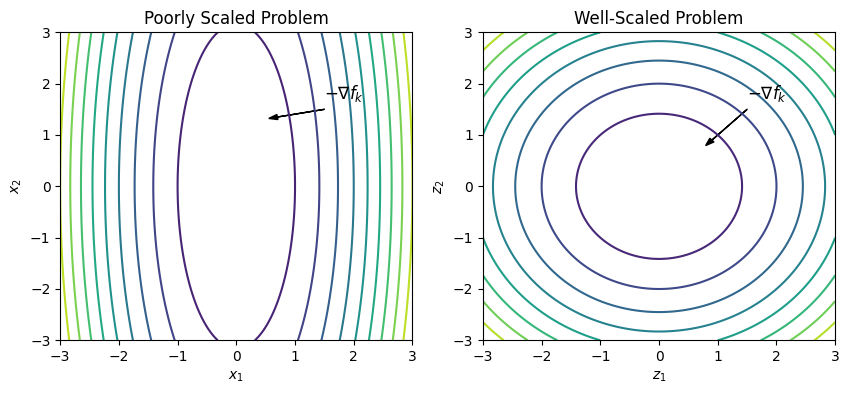

In [13]:
# Create a grid of points
x1 = np.linspace(-3, 3, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define the original and scaled functions
F_original = 10 * X1**2 + X2**2
F_scaled = X1**2 + X2**2  # After scaling: z1 = sqrt(10) * x1

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot original function
cs1 = axes[0].contour(X1, X2, F_original, levels=10)
axes[0].set_title("Poorly Scaled Problem")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].arrow(1.5, 1.5, -0.8, -0.15, head_width=0.1, color='black')
axes[0].text(1.5, 1.7, r"$-\nabla f_k$", fontsize=12)

# Plot scaled function
cs2 = axes[1].contour(X1, X2, F_scaled, levels=10)
axes[1].set_title("Well-Scaled Problem")
axes[1].set_xlabel("$z_1$")
axes[1].set_ylabel("$z_2$")
axes[1].arrow(1.5, 1.5, -0.6, -0.6, head_width=0.1, color='black')
axes[1].text(1.5, 1.7, r"$-\nabla f_k$", fontsize=12)

plt.savefig('figures/gradient_descent_scaling.pdf', bbox_inches='tight')

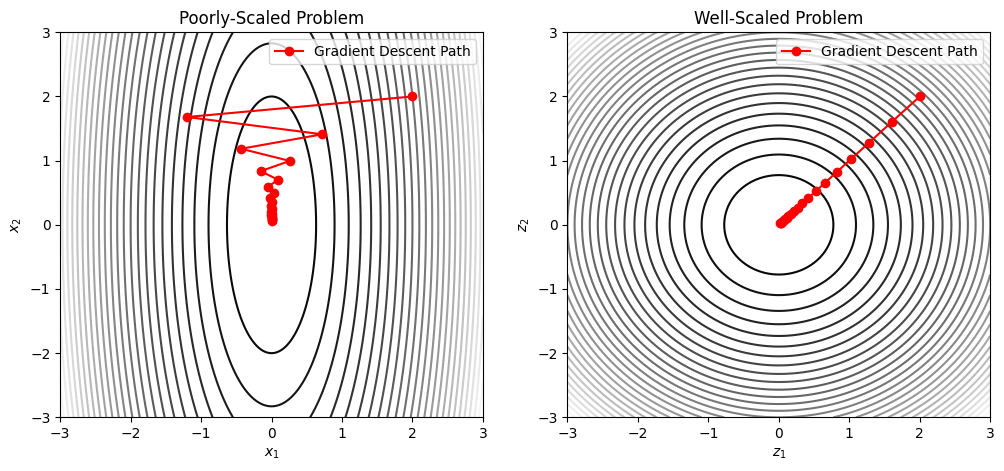

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points
x1 = np.linspace(-3, 3, 400)
x2 = np.linspace(-3, 3, 400)
X1, X2 = np.meshgrid(x1, x2)

# Define the functions
F_original = 10 * X1**2 + X2**2
F_scaled = X1**2 + X2**2  # scaled: z1 = sqrt(10) * x1, z2 = x2

# Gradient descent function
def gradient_descent(f_grad, x0, lr=0.1, steps=20):
    traj = [x0]
    x = x0.copy()
    for _ in range(steps):
        grad = f_grad(x)
        x = x - lr * grad
        traj.append(x.copy())
    return np.array(traj)

# Gradients
grad_original = lambda x: np.array([20 * x[0], 2 * x[1]])
grad_scaled   = lambda x: np.array([2 * x[0], 2 * x[1]])

# Run GD
traj_orig = gradient_descent(grad_original, x0=np.array([2.0, 2.0]), lr=0.08, steps=20)
traj_scaled = gradient_descent(grad_scaled, x0=np.array([2.0, 2.0]), lr=0.1, steps=20)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Poorly scaled
cs1 = axes[0].contour(X1, X2, F_original, levels=30, cmap='gray')
axes[0].plot(traj_orig[:, 0], traj_orig[:, 1], 'o-', color='red', label='Gradient Descent Path')
axes[0].set_title("Poorly-Scaled Problem")
axes[0].set_xlabel("$x_1$")
axes[0].set_ylabel("$x_2$")
axes[0].legend()

# Well-scaled
cs2 = axes[1].contour(X1, X2, F_scaled, levels=30, cmap='gray')
axes[1].plot(traj_scaled[:, 0], traj_scaled[:, 1], 'o-', color='red', label='Gradient Descent Path')
axes[1].set_title("Well-Scaled Problem")
axes[1].set_xlabel("$z_1$")
axes[1].set_ylabel("$z_2$")
axes[1].legend()

plt.savefig('figures/gradient_descent_scaling.pdf', bbox_inches='tight')